<p><span style="font-size: large; background-color: #ffffff; color: #000000;"><strong>Consignes :</strong></span></p>
<ul>
<li><span style="font-size: large; background-color: #ffffff; color: #000000;"><strong><strong>Renommer ce fichier en ordre alphab&eacute;tique avec le numéro i de votre Tiers <span style="color: #ff0000;">Ti_nom1-nom2-TP11</span></strong></strong></span></li>
<li><span style="font-size: large; background-color: #ffffff; color: #000000;"><strong><strong><strong>TP &agrave; rendre sur Teams&nbsp;<span><span style="color: #ff0000;">pour le 22 avril</span>.</span>&nbsp;</strong></strong></strong></span></li>
<li><span style="font-size: large; background-color: #ffffff; color: #000000;"><strong>TP &agrave; faire en groupe de 2. Le groupe de travail est le m&ecirc;me pour toute l'ann&eacute;e.</strong></span></li>
<li><span style="font-size: large; background-color: #ffffff; color: #ff0000;"><span style="color: #000000;"><strong>&Agrave; compl&eacute;ter :</strong></span></span></li>
</ul>
<p><span style="font-size: large; background-color: #ffffff; color: #ff0000;"><strong>NOM PRENOM 1 : CLARY Emilie <br /></strong></span></p>
<p><span style="font-size: large; background-color: #ffffff; color: #ff0000;"><strong>NOM PRENOM 2 : RIGAUD Mathilde</strong></span></p>
<p><span style="font-size: large; background-color: #ffffff; color: #ff0000;"><strong>NOM PRENOM 2 : VAN BOXEM Rémi</strong></span></p>
<p>&nbsp;</p>
<p><br /><span style="font-size: large;"><strong></strong><strong>TP 11 : Espaces vectoriels<br /></strong></span></p>






<p><span style="font-size: medium;">Avant de commencer: prenez le temps de r&eacute;viser les concepts li&eacute;s aux matrices, vecteurs, syst&egrave;mes d'&eacute;quations lin&eacute;aires, ... des s&eacute;ances de TP pr&eacute;c&eacute;dentes.</span></p>
<p><span style="font-size: medium;"><strong></strong><strong><br /></strong></span></p>
<p><span style="text-decoration: underline;">EXERCICE 1 (Interpolation polynomiale)</span></p>
<p>Consid&eacute;rons le probl&egrave;me suivant: on cherche un polyn&ocirc;me $P(X)$ &agrave; coefficients r&eacute;els dont le graphe passe par les points</p>
<p>$$ (1,4), \ (2,-1), \ (3,2), \ (4,3), \ (5, 1). $$</p>
<p>a) Soit $V$ l'espace vectoriel des polyn&ocirc;mes de degr&eacute; $\leq 4$ et $f: V \to \mathbb{R}^5$ l'application lin&eacute;aire d&eacute;finie par</p>
<p>$$ f(P) = (P(1), P(2), P(3), P(4), P(5)) $$</p>
<p>Construire informatiquement une matrice $A$ repr&eacute;sentant $f$ en calculant tout d'abord $f(1), \ f(X), \ f(X^2), \ f(X^3), \ f(X^4).$</p>

In [1]:
x = var('x')
def f(P):
    return vector([P(x=1), P(x=2), P(x=3), P(x=4), P(x=5)])

A = matrix([f(x^i) for i in range(5)])

show(A)

[  1   1   1   1   1]
[  1   2   3   4   5]
[  1   4   9  16  25]
[  1   8  27  64 125]
[  1  16  81 256 625]

<p>b) V&eacute;rifier la validit&eacute; de votre matrice $A$ de la question pr&eacute;c&eacute;dente en l'utilisant pour calculer $f(Q)$ et $f(R)$ avec $Q(X) = X^3 - X + 1$ et $R(X) = 2X^4 - 1$ (et v&eacute;rifiez que vous obtenez bien les bonnes r&eacute;ponses !).</p>

In [2]:
Q(x) = x^3 - x +1
R(x) = 2*x^4-1

show(f(Q))
show(f(R))

(1, 7, 25, 61, 121)

(1, 31, 161, 511, 1249)

<p>c) Pour revenir &agrave; la question initiale: convainquez-vous que $f$ est bijective en remarquant que $A$ est inversible, et d&eacute;terminez $f^{-1}(4,-1,2,3,1)$ en utilisant $A^{-1}$.</p>

In [3]:
show("Le déterminant de A est :")
show(det(A))
show("On remarque que le déterminant de A est différent de 0.")
show("Donc A est inversible.")

R = PolynomialRing(RR, 'x')
points = [(1,4),(2,-1),(3,2),(4,3),(5,1)] # points d'interpolation
f = R.lagrange_polynomial(points) # polynôme de interpolation

show(f)

'Le déterminant de A est :'

288

'On remarque que le déterminant de A est différent de 0.'

'Donc A est inversible et est inversible.'

0.375000000000000*x^4 - 5.41666666666667*x^3 + 27.1250000000000*x^2 - 54.0833333333333*x + 36.0000000000000

<p>d) Repr&eacute;senter sur une m&ecirc;me figure: le graphe du polyn&ocirc;me $P$ obtenu &agrave; la question pr&eacute;c&eacute;dente ainsi que les $5$ points $(1,4), (2,-1), (3,2), (4,3), (5, 1)$ pour v&eacute;rifier que $P$ passe bien par ceux-ci.</p>

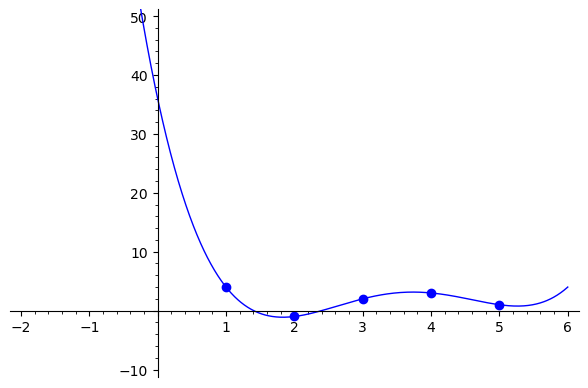

In [4]:
R = PolynomialRing(RR, 'x') # anneau de polynômes à coefficients réels
points = [(1,4),(2,-1),(3,2),(4,3),(5,1)] # points d'interpolation
fonction = R.lagrange_polynomial(points) # polynôme de interpolation

P = plot(f,-2,6) # graphique du polynôme
Q = line(points, marker='o', linestyle="") # graphique des points

show(P+Q, xmin=-2, xmax=6, ymin=-10, ymax=50)

<p>EXERCICE 2: (Interpolation d'Hermite)</p>
<p>Encore un probl&egrave;me o&ugrave; on cherche un polyn&ocirc;me: on cherche cette fois-ci un polyn&ocirc;me $P$ de degr&eacute; $\leq 3$ pour lequel</p>
<p>$$ P(0) = 1, \ P'(0) = -2, \ P(1) = 4, \ P'(1) = 2. $$</p>
<p>a) Donner une repr&eacute;sentation matricielle de l'application $P \mapsto (P(0), P'(0), P(1), P'(1))$.</p>

In [9]:
# P(1)=[1,0,1,0], P(x)=[0,1,1,1], P(x²)=[0,0,1,2], P(x³)=[0,0,1,3]

A = matrix([[1, 0, 0, 0],[0, 1, 0, 0],[1, 1, 1, 1],[0, 1, 2, 3]])

# Représentation matricielle de l'application P
show(A)

[1 0 0 0]
[0 1 0 0]
[1 1 1 1]
[0 1 2 3]

<p>b) V&eacute;rifier que votre repr&eacute;sentation matricielle fonctionne bien en l'utilisant pour calculer l'image de $Q(X) = X^3 + X^2 - X + 1$ et $R(X) = X^2 + 3 X$.</p>

In [17]:
Q(x) = x^3 + x^2 - x +1
R(x) = x^2+3*x
Qderive=3*x^2+2*x-1
Rderive=2*x+3

# Affichage des polynômes
show(Q(x))
show(R(R))

x^3 + x^2 - x + 1

(x^2 + 3*x)^2 + 3*x^2 + 9*x

In [19]:
# Vérification

#Test pour Q

#Pour x=0
print("Q(0) =", Q(0))
print("Q'(0)=",Qderive(0))

#Puis pour x=1
print("Q(1)=",Q(1))
print("Q'(1)=",Qderive(1))

Q(0) = 1
Q'(0)= -1
Q(1)= 2
Q'(1)= 4


In [20]:
#Test pour R

#Pour x=0
print("R(0)=",R(0))
print("R'(0)=",Rderive(0))

#Puis pour x=1
print("R(1)=",R(1))
print("R'(1)=",Rderive(1))

R(0)= 0
R'(0)= 3
R(1)= 4
R'(1)= 5


<p>c) Montrer qu'il existe un unique polyn&ocirc;me de degr&eacute; inf&eacute;rieur ou &eacute;gal $3$ satisfaisant les conditions impos&eacute;es et d&eacute;terminez-le.</p>

In [28]:
if A.det() == 0:
    print("A n'est pas inversible")

else:
    print("A est inversible")
    X = vector([1,-2,4,2])
    Ainverse = ~A
    print("f⁻¹(1, -2, 4, 2) =", Ainverse*X)

A est inversible
f⁻¹(1, -2, 4, 2) = (1, -2, 11, -6)


<p>d) Repr&eacute;sentez, sur une m&ecirc;me figure, le graphe du polyn&ocirc;me trouv&eacute; &agrave; la question pr&eacute;c&eacute;dente, les points $(0,1)$ et $(1,4)$ ainsi que ses tangentes en $x = 0$ et $x = 1$ pour v&eacute;rifier la coh&eacute;rence de votre r&eacute;ponse.</p>

In [35]:
# P = -6x³ + 11x² - 2x +1

x=var('x')
P=-6*x^3+11*x^2-2*x+1
Pderive=-6*3*x^2+11*2*x-2
for i in range (0,2):
    temp=P(i)
    show("P (",i,") = ",temp)

'P (' 0 ') = ' 1

'P (' 1 ') = ' 4

Graphique :


<ipython-input-36-aa4081f38b7b>:8: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  show(plot(P,(x,Integer(0),Integer(3)),color='blue')+P1+P2+plot(tan(Integer(0),P,Pderive),(x,Integer(0),Integer(3)),color='red')+plot(tan(Integer(1),P,Pderive),(x,Integer(0),Integer(3)),color='red'))


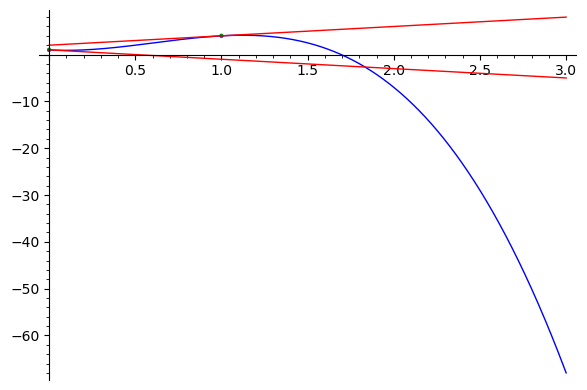

In [36]:
print("Graphique :")
P1 = point((0,1),color='green')
P2 = point((1,4),color='green')

def tan(a,f,fderive): ## Tangente fonction
    return fderive(a)*(x-a)+f(a)

show(plot(P,(x,0,3),color='blue')+P1+P2+plot(tan(0,P,Pderive),(x,0,3),color='red')+plot(tan(1,P,Pderive),(x,0,3),color='red'))

# On obtient un résultat cohérent
